Exercise 3

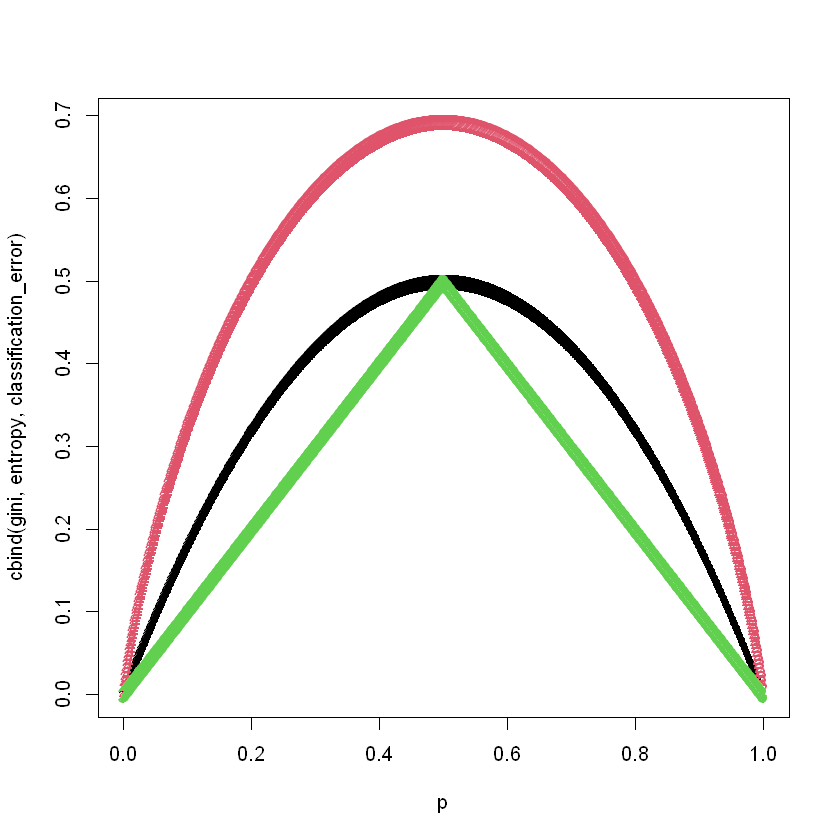

In [4]:
p = seq(0, 1, 0.001)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
classification_error = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, classification_error))

Exercise 5

In [14]:
# majority vote
data <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
sum(data >= 0.5)
sum(data <= 0.5)
ifelse(sum(data >= 0.5) > sum(data < 0.5), "Red", "Green")

[1] 6

[1] 4

[1] "Red"

In [15]:
# average approach
mean(data)
ifelse(mean(data) >= 0.5, "Red", "Green")

[1] 0.45

[1] "Green"

Exercise 8


In [24]:
library(ISLR)
attach(Carseats)
set.seed(1)

nrow(Carseats)

sample <- sample(400,200)
train <- Carseats[sample, ]
test <- Carseats[-sample, ]


The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 7):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




[1] 400


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

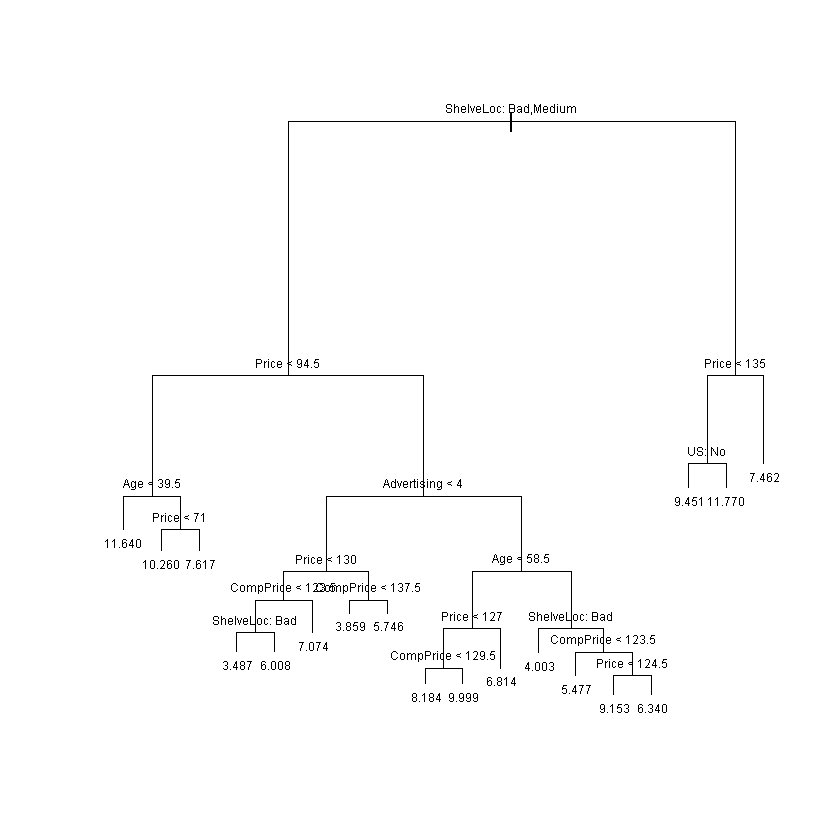

In [31]:
# Regression Tree 
library(tree)
tree <- tree(Sales ~ ., train)
plot(tree)
text(tree, pretty = 0, cex = 0.6)
summary(tree)

[1] 4.918134

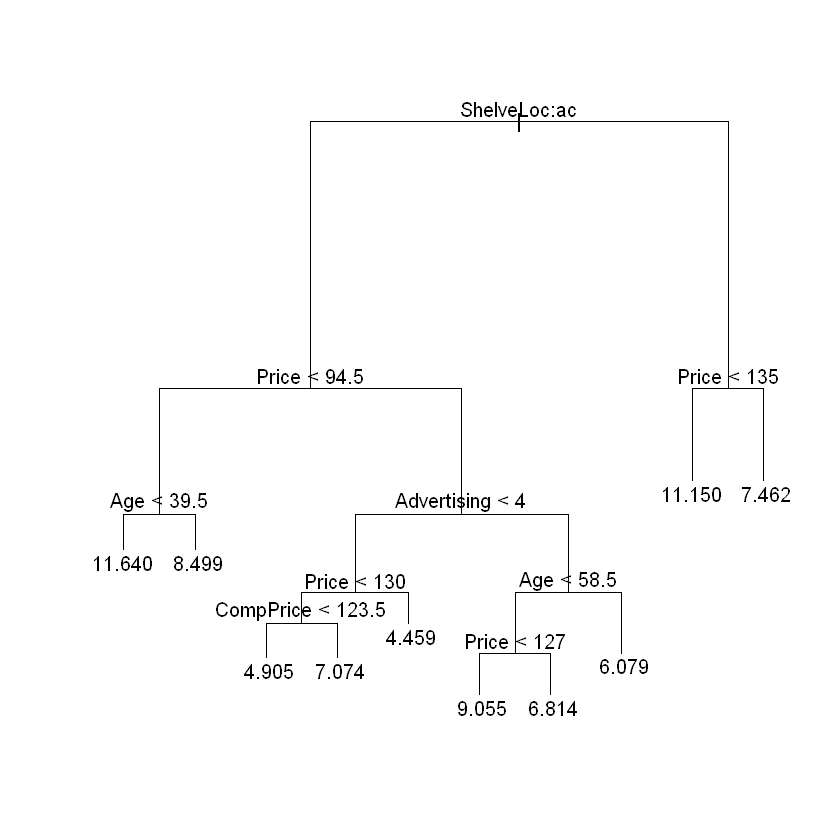

In [49]:
cv_carseats = cv.tree(tree, FUN = prune.tree)
prune = prune.tree(tree, best = 9)
prune_pred = predict(prune, test)
mean((test$Sales - prune_pred)^2)
plot(prune)
text(prune)

In [39]:
#bagging appraoch
library(randomForest)

In [50]:
bagging = randomForest(Sales ~ ., data = train, mtry = 10, ntree = 500, importance = T)
bagging_pred = predict(bagging, test)
mean((test$Sales - bagging_pred)^2)
importance(bagging)
#MSE decreased to 2.62
# most importznt variables are Price and ShelveLoc

[1] 2.619601

,%IncMSE,IncNodePurity
CompPrice,26.09568624,171.76614
Income,4.42146937,88.50634
Advertising,13.29016637,101.09679
Population,-2.63471005,57.09549
Price,57.90180673,499.41307
ShelveLoc,49.67750854,386.80073
Age,16.94583624,154.91958
Education,-0.02654105,44.70043
Urban,1.41975215,10.01218
US,4.66176774,17.14309


Exercise 9

In [55]:
library(ISLR)
attach(OJ)
set.seed(1)
sample <- sample(1:nrow(OJ),800)
train <- OJ[sample, ]
test <- OJ[-sample, ]


The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase


The following objects are masked from OJ (pos = 4):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase


The following objects are masked from OJ (pos = 5):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase


The following objects are masked from OJ (pos = 6):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreI

In [58]:
#Classification tree
tree <- tree(Purchase ~ ., train)

summary(tree)
#training error rate is 0.158
# 9 terminal nodes


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

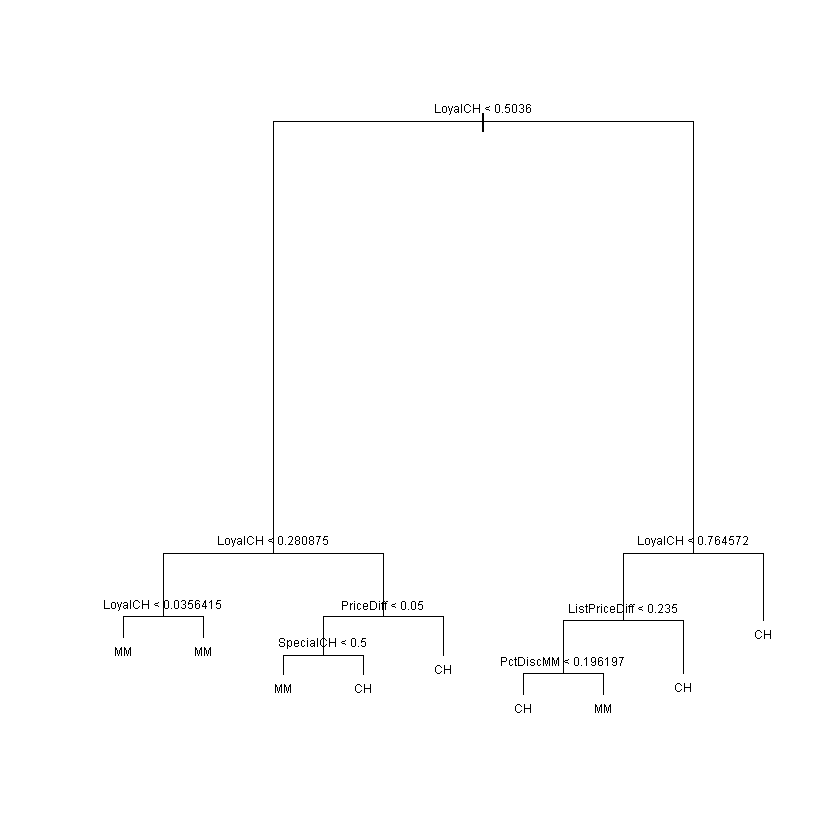

In [61]:
#plot tree
plot(tree)
text(tree, pretty = 0, cex = 0.6)

In [63]:
#test error
test_pred <- predict(tree, test, type = "class")
summary(test_pred)

CH  MM 
198  72